In [1]:
import pandas as pd
pd.set_option('display.max_columns', 25)
df = pd.read_csv('C:\Various Files\DataScience\ChicagoCrime\Crimes_2001_to_2018_clean.csv' )

df['Date'] = pd.to_datetime(df['Date']).
df['Updated_On'] = pd.to_datetime(df['Updated_On'])

In [14]:
ref = pd.read_csv('C:\Various Files\DataScience\ChicagoCrime\ReferenceCCA20112015.csv')


census = ref[['GEOG', 'TOT_POP', 'MED_AGE','UND19', 'A20_34', 'A35_49', 'A50_64', 'A65_79','OV80', 
                   'IN_LBFRC', 'EMP', 'UNEMP', 'NOT_IN_LBFRC',
                  'HS', 'BACH',
                  'MEDINC', 'INC_LT_25K', 'INC_25_50K', 'INC_50_75K', 'INC_75_100K', 'INC_100_150K', 'INC_GT_150',
                  'OWN_OCC_HU', 'RENT_OCC_HU', 'HU_TOT',
                   'BR_0_1', 'BR_2', 'BR_3', 'BR_4', 'BR_5']]

In [15]:
community_areas_numbers = pd.read_csv('C:\Various Files\DataScience\ChicagoCrime\Community_Areas_Names_w_Numbers.csv')
community_areas_numbers.columns = ['Community_Area', 'GEOG']

census = pd.merge(census, community_areas_numbers, on='GEOG', how = 'inner')
census.shape

(77, 31)

In [16]:
census.head(5)

,GEOG,TOT_POP,MED_AGE,UND19,A20_34,A35_49,A50_64,A65_79,OV80,IN_LBFRC,EMP,UNEMP,...,INC_75_100K,INC_100_150K,INC_GT_150,OWN_OCC_HU,RENT_OCC_HU,HU_TOT,BR_0_1,BR_2,BR_3,BR_4,BR_5,Community_Area
0,Albany Park,52079,33.770750,13550,13719,11806,8412,3257,1335,29624,26868,2703,...,1912,1936,1579,6405,10068,18191,4459,7331,4826,1234,341,14
1,Archer Heights,13266,31.991324,4205,2948,2830,1924,947,411,6594,5808,786,...,317,425,114,2140,1700,4247,357,1455,1806,402,227,57
2,Armour Square,14068,41.954645,3029,3004,2500,2806,1815,915,6997,5919,1078,...,263,383,121,1858,3362,5717,1358,1877,2040,285,158,34
3,Ashburn,42752,36.164390,12506,8188,8951,8557,3401,1149,21985,19004,2981,...,2083,2307,923,10850,1973,13481,397,2221,7452,2548,863,70
4,Auburn Gresham,45842,39.134577,12050,8948,7776,9624,5420,2024,20187,14910,5234,...,1103,972,306,7498,9652,20435,3672,7045,6608,2139,971,71


In [17]:
census['UNEMP_RATE'] = census['UNEMP']/(census['EMP'] + census['UNEMP'])
census['HS_RATE'] = census['HS']/census['TOT_POP']
census['BACH_RATE'] = census['BACH']/census['TOT_POP']
census['OWN_OCC_HU_RATE'] = census['OWN_OCC_HU']/census['HU_TOT']

In [18]:
# the census data gathered between 2011-2015

df_sub = df[df['Date'].dt.year == 2015]['ID'].groupby(df['Community_Area']).count()
df_sub = df_sub.reset_index()
df_sub.rename(columns={'ID':'Crime_Number'}, inplace = True)
df_sub.head()

,Community_Area,Crime_Number
0,1,3508
1,2,3051
2,3,3562
3,4,1739
4,5,1369


In [19]:
merged_df = pd.merge(census, df_sub, on='Community_Area', how='inner')
merged_df.head()

,GEOG,TOT_POP,MED_AGE,UND19,A20_34,A35_49,A50_64,A65_79,OV80,IN_LBFRC,EMP,UNEMP,...,HU_TOT,BR_0_1,BR_2,BR_3,BR_4,BR_5,Community_Area,UNEMP_RATE,HS_RATE,BACH_RATE,OWN_OCC_HU_RATE,Crime_Number
0,Albany Park,52079,33.770750,13550,13719,11806,8412,3257,1335,29624,26868,2703,...,18191,4459,7331,4826,1234,341,14,0.091407,0.503312,0.201271,0.352097,2499
1,Archer Heights,13266,31.991324,4205,2948,2830,1924,947,411,6594,5808,786,...,4247,357,1455,1806,402,227,57,0.119199,0.407583,0.066938,0.503885,981
2,Armour Square,14068,41.954645,3029,3004,2500,2806,1815,915,6997,5919,1078,...,5717,1358,1877,2040,285,158,34,0.154066,0.471709,0.152829,0.324996,1060
3,Ashburn,42752,36.164390,12506,8188,8951,8557,3401,1149,21985,19004,2981,...,13481,397,2221,7452,2548,863,70,0.135592,0.519297,0.125351,0.804836,2274
4,Auburn Gresham,45842,39.134577,12050,8948,7776,9624,5420,2024,20187,14910,5234,...,20435,3672,7045,6608,2139,971,71,0.259829,0.551983,0.093211,0.366920,7726


In [21]:
merged_df['Crime_Rate'] = merged_df['Crime_Number']/merged_df['TOT_POP']

In [24]:
%config IPCompleter.greedy=True

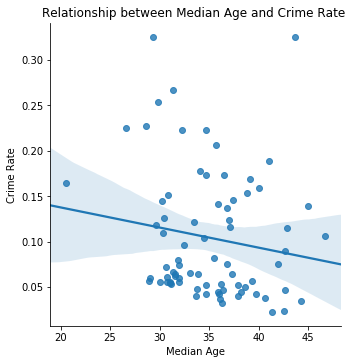

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='MED_AGE', y='Crime_Rate', data= merged_df)
plt.title( 'Relationship between Median Age and Crime Rate ')
plt.xlabel( 'Median Age')
plt.ylabel( 'Crime Rate')
plt.show()

In [50]:
import numpy as np

def pearson_r(data1, data2):
    corr_coff = np.corrcoef(data1, data2)
    return corr_coff[0, 1]

In [51]:
print ( "The Pearson correlation cofficient = ", pearson_r(merged_df['MED_AGE'], merged_df['Crime_Rate']))

The Pearson correlation cofficient =  -0.15103330417608343


#### Observations:
Except the outliers, it seems that crime rate weakly deceases with the increase with the median age for a Community Area. 

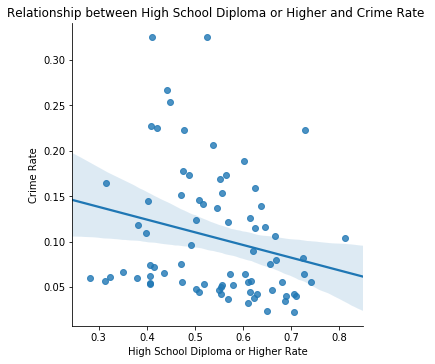

In [41]:
sns.lmplot(x='HS_RATE', y='Crime_Rate', data= merged_df)
plt.title( 'Relationship between High School Diploma or Higher and Crime Rate ')
plt.xlabel( 'High School Diploma or Higher Rate')
plt.ylabel( 'Crime Rate')
plt.show()

In [53]:
print ( "The Pearson correlation cofficient = ", pearson_r(merged_df['HS_RATE'], merged_df['Crime_Rate']))

The Pearson correlation cofficient =  -0.2347569871119991


#### Observations:
It seems that crime rate deceases with the increase with the high school diploma or higher for a Community Area. 

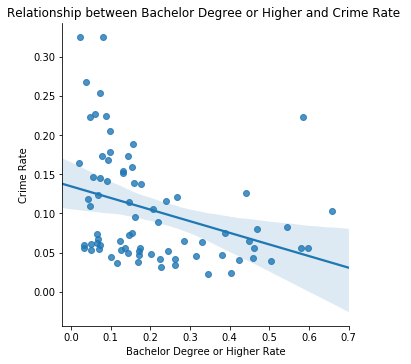

In [42]:
sns.lmplot(x='BACH_RATE', y='Crime_Rate', data= merged_df)
plt.title( 'Relationship between Bachelor Degree or Higher and Crime Rate ')
plt.xlabel( 'Bachelor Degree or Higher Rate')
plt.ylabel( 'Crime Rate')
plt.show()

In [54]:
print ( "The Pearson correlation cofficient = ", pearson_r(merged_df['BACH_RATE'], merged_df['Crime_Rate']))

The Pearson correlation cofficient =  -0.34219987509124355


#### Observations:
It seems that crime rate deceases with the increase with the Bachelor's degree or higher for a Community Area. The negative relatinship here is stronger than the negative relatioinship between High School Diploma or Higher and Crime Rate.

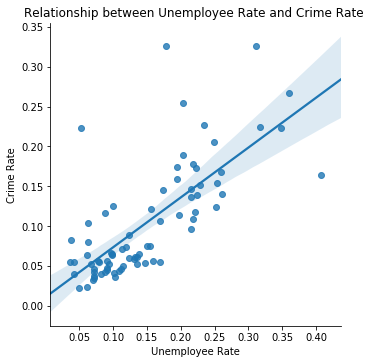

In [43]:
sns.lmplot(x='UNEMP_RATE', y='Crime_Rate', data= merged_df)
plt.title( 'Relationship between Unemployee Rate and Crime Rate ')
plt.xlabel( 'Unemployee Rate')
plt.ylabel( 'Crime Rate')
plt.show()

In [55]:
print ( "The Pearson correlation cofficient = ", pearson_r(merged_df['UNEMP_RATE'], merged_df['Crime_Rate']))

The Pearson correlation cofficient =  0.731055382130882


#### Observations:
The crime rate and unemployee rate have very strong positive relationship.

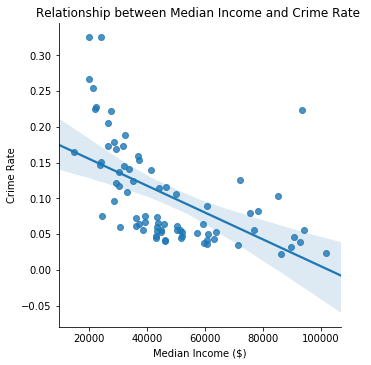

In [45]:
sns.lmplot(x='MEDINC', y='Crime_Rate', data= merged_df)
plt.title( 'Relationship between Median Income and Crime Rate ')
plt.xlabel( 'Median Income ($)')
plt.ylabel( 'Crime Rate')
plt.show()

In [56]:
print ( "The Pearson correlation cofficient = ", pearson_r(merged_df['MEDINC'], merged_df['Crime_Rate']))

The Pearson correlation cofficient =  -0.5587985913803861


#### Observations:
The crime rate and median income have strong negative relationship.

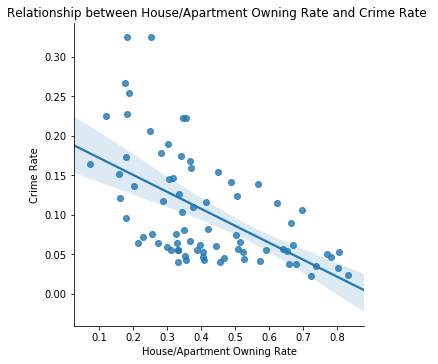

In [47]:
sns.lmplot(x='OWN_OCC_HU_RATE', y='Crime_Rate', data= merged_df)
plt.title( 'Relationship between House/Apartment Owning Rate and Crime Rate ')
plt.xlabel( 'House/Apartment Owning Rate')
plt.ylabel( 'Crime Rate')
plt.show()

In [57]:
print ( "The Pearson correlation cofficient = ", pearson_r(merged_df['OWN_OCC_HU_RATE'], merged_df['Crime_Rate']))

The Pearson correlation cofficient =  -0.564974878796443


#### Observations:
- The crime rate and house owning rate have strong negative relationship.

- From the above, the unemployment rate has the strongest relationship with the crime rate, and the median age has the weakest relationship with the crime rate.